In [125]:
# !pip install WordCloud
# !pip install plotly

# EXPLORATORY DATA ANALYSIS

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS


patientcomments = pd.read_csv(r'C:\Users\moaaz\Desktop\patientcomments.csv')


**Let's drop all missing values from the data altogether.**

In [152]:
patientcomments.dropna(inplace=True)

**Let's drop the duplicate column of `Ratings`.**

In [153]:
patientcomments.drop('RATING.1', axis=1, inplace=True)

In [154]:
patientcomments.shape

(2829, 4)

**Let's look at some information about the dataset, its shape, missing values, etc.**

In [155]:
patientcomments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 1 to 5659
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RATING         2829 non-null   object
 1   COMMENT        2829 non-null   object
 2   RECEIVED DATE  2829 non-null   object
 3   SECTION        2829 non-null   object
dtypes: object(4)
memory usage: 110.5+ KB


In [156]:
patientcomments.isnull().sum()

RATING           0
COMMENT          0
RECEIVED DATE    0
SECTION          0
dtype: int64

In [157]:
patientcomments.shape

(2829, 4)

**Let's convert the date column to `DateTime` datatype, extract the month from it, and store it in a column named `Month`.**

In [158]:
patientcomments['RECEIVED DATE'] = pd.to_datetime(patientcomments['RECEIVED DATE'], infer_datetime_format=True, errors='coerce')

In [159]:
patientcomments['month'] = patientcomments['RECEIVED DATE'].dt.month
patientcomments['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)

***As you can see, now we have got a nice month column. It'll be used later in EDA!***
<hr></hr>

In [160]:
patientcomments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 1 to 5659
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RATING         2829 non-null   object        
 1   COMMENT        2829 non-null   object        
 2   RECEIVED DATE  2829 non-null   datetime64[ns]
 3   SECTION        2829 non-null   object        
 4   month          2829 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 132.6+ KB


**Let's see the distribution of unique values in the ratings column.**

In [161]:

fig = px.histogram(patientcomments, x='RATING', color='RATING', histfunc='count')
fig.update_layout(
    title='Distribution of unique values in ratings column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='Count', 
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

**Let's see the distribution of unique values in the section column.**

In [162]:

fig = px.histogram(patientcomments, x='SECTION', histfunc='count')
fig.update_layout(
    title='Distribution of unique values in section column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

**Let's view the rating grouped by section.**

In [163]:
groupby_rating_section = patientcomments.groupby(['SECTION', 'RATING'])[['RATING']].count()

In [164]:
groupby_rating_section.style.applymap(lambda x: "background-color: gray" if x>50 else "background-color: wheat")
groupby_rating_section.style.applymap(lambda x: "color: red")

**Let's display number of patient comments for every month!**

In [165]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(patientcomments, x='month', histfunc='count')
fig.update_layout(
    title='Nunber of patient comments for each month', 
    xaxis = dict(
        title='Month', 
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        title='No. of comments', 
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

**Let's display a violin plot as well.**

In [166]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.violin(patientcomments, x='month', points='outliers')
fig.update_layout(
    title='Violin plot for number of patients per moth', 
    xaxis = dict(
        title='Month', 
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

**Let's see the number of ratings in each section, grouped by the rating column itself!**

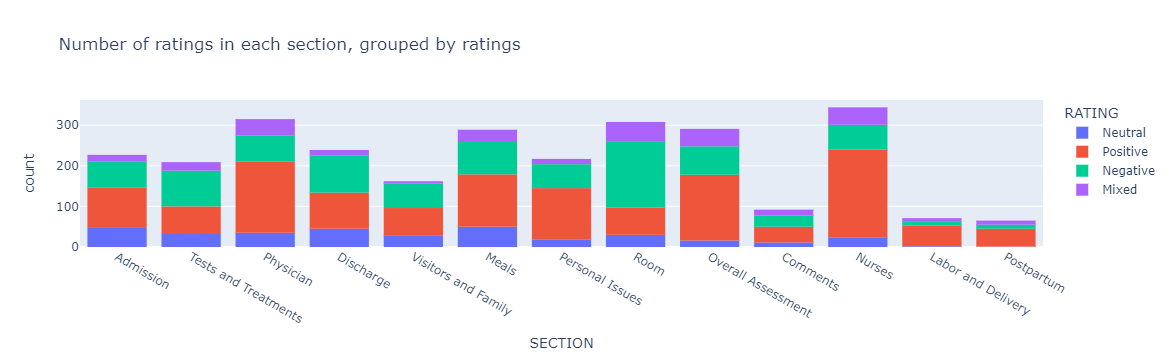

In [119]:
px.histogram(data_frame = patientcomments
             ,x = 'SECTION'
             ,color = 'RATING', title = "Number of ratings in each section, grouped by ratings"
             )

**Lastly, let's also generate a Word cloud of all the text in the `comments` column!**

In [122]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in patientcomments.COMMENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

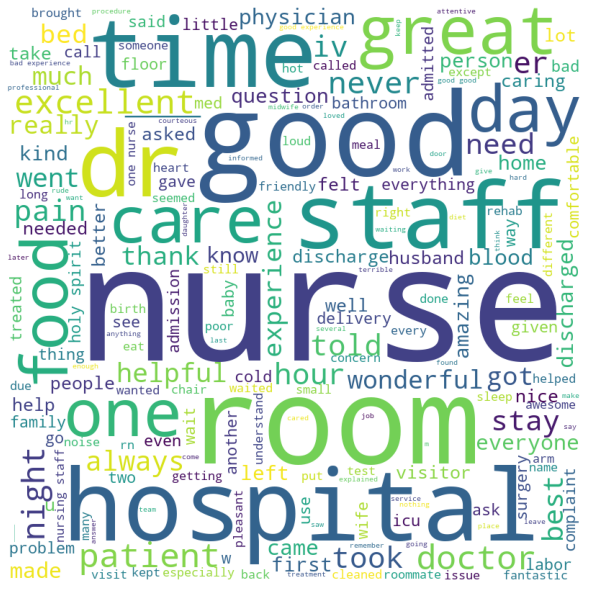

In [124]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()